## Bayes Lab 2

In this lab we will revisit the traffic intersection problem from last week. As a reminder, given an expected number of accidents during one day we had to determine if the county has to put up a warning sign. 

In this lab we will estimate the expected number of accidents given a dataset. We used the Poisson Distribution to model the number of occurances $N \in \mathbb{N}$ during a given time intervall:

$$\frac{dP}{d\mu_\mathbb{N}}(k) =  \frac{\lambda^{k} e^{-\lambda}}{k!} = \frac{\lambda^{k} e^{-\lambda}}{\Gamma(k+1)} $$

**Exercise 1:**

We can look at the function:

$$F(x, \lambda) = \lambda^{x}e^{-\lambda}$$ 

as either a function of $x$ holding $\lambda$ constant $x \to F(x,\lambda_0)$ in which case it becomes the **unnormalized** Poisson probability density.

Look at the functional form of the map $\lambda \to F(x_0,\lambda) = \lambda^{x_0}e^{-\lambda}$ and determine to what class of probability densities that map belongs. Let's call that distribution density $F_{\theta}$ from here on which has one hyperparameter $\theta$.

**Solution 1:**

The Gamma distribution is defined by:

$$\frac{dP_{(\beta, \alpha)}}{d\lambda_L}(x) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha -1} e^{-\beta x} ,\, \beta >0, \alpha >0$$

and by comparing it to the above functional form we can infer that the density corresponding to the map $\lambda \to F(x_0,\lambda) = \lambda^{x_0}e^{-\lambda}$ is a special subclass of the Gamma Distributions where $\beta = 1$.

$$F_{\theta}(\lambda) = \frac{\lambda^{\theta - 1}e^{-\lambda}}{\Gamma(\theta)}$$.

**Exercise 2:**

Plot $F_{\theta}$ for at least 4 values of $\theta$.

*Hint:* Use the following expression to reformulate $F_{\theta}$ so that python accepts fractional values of $\theta$.

$$x^y = e^{y*log(x)}$$

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply


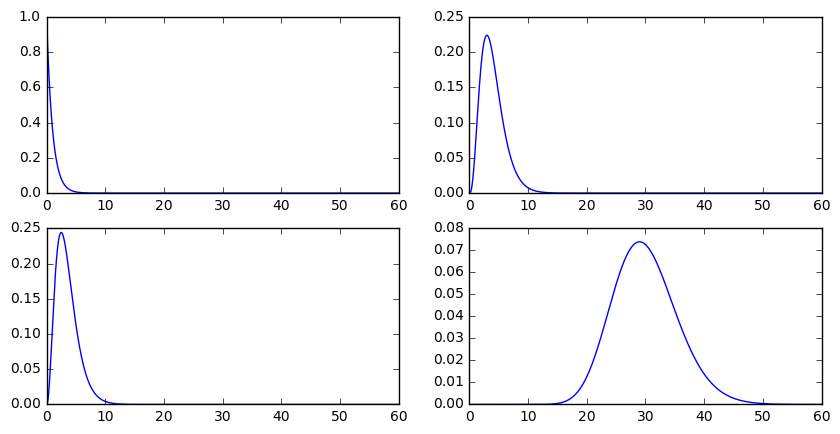

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy.integrate import quad
from scipy.integrate import nquad
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

F0 = lambda t : lambda x: (np.exp(-x)*(np.exp((t-1)*np.log(x))))/gamma(t)
X = np.arange(0,60,.01)
t = [1.,4.,3.5,30.]
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.reshape(4,)
zipped = zip(ax,t)

for e in zipped:
    e[0].plot(X,F0(e[1])(X))
    


**Exercise 3:**

Calculate the expectation value for a random variable $X$ which is distributed with $F_{\theta}$ for a few values of $\theta$ and derive an interpretation of the model parameter $\theta$.

In [41]:
beta_exp = lambda t: lambda l: l*(np.exp((t-1)*np.log(l)))*np.exp(-l)/gamma(t)

Em = [quad(beta_exp(i), 0.00001, np.inf) for i in t]

for i in range(len(t)):
    print('For theta = {0}, Exp Value = {1: 0.2f}'.format(t[i], Em[i][0]))

For theta = 1.0, Exp Value =  1.00
For theta = 4.0, Exp Value =  4.00
For theta = 3.5, Exp Value =  3.50
For theta = 30.0, Exp Value =  30.00


**Exercise 4:**

You were sitting at the intersection for 100 days and noted the number of accidents for each day. Your result is the list occ. Each element of occ is one experimental data point.

Choose an appropriate prior distribution from the class $F_{\theta}$ and derive $P(\lambda|\mathscr{D})$.
Plot the prior and the posteriori distribution in one plot.

*Hint:* Check if your posteriori distribution is properly normalized. The evidence is very small compared to the function values of likelihood*prior. If the posteriori is not normalized after deviding by the evidence can you think of a way how to redefine your equations so that you can appropriatly normalize?

In [50]:
occ = [ 8,  5,  6,  5,  4,  1,  8,  5,  4, 12,  6,  5,  4,  4,  4,  7,  6,
        7,  7,  6,  3,  1,  8,  2,  6,  0,  5,  1, 11,  5,  2,  0,  4,  8,
        8,  3,  3,  6,  5,  3,  5,  7,  6,  2,  5,  6,  5,  9,  5,  7,  6,
        3,  2,  1,  5,  5,  9,  5,  9,  5,  8,  5,  3,  3,  4,  3,  5,  6,
        3,  5,  5,  5,  5,  7,  0,  3,  6,  2,  7,  2,  5,  5,  3,  5,  3,
        5,  3,  4,  3,  8,  9,  3,  7,  1,  6,  6,  6,  3,  7,  7]


PLD = lambda x: lambda n: (((1/gamma(4))*(x**3)*np.exp(-x))*np.prod([(((x**n)*(np.exp(-x)))/gamma(5)) for n in occ]))\
                        / quad(F0(4)(x),0,np.infty)[0]
    
    
print PLD(2)

<function <lambda> at 0x10e0f9578>


**Exercise 5:**

We have to make a decision which $\lambda$ value to pick, which represents the average number of accidents per day in our model. One choice we could make is to take the expectation value $E[\lambda|\mathscr{D}]$. Another one could be to pick the value $\lambda_{MAP}$ for which the posteriori density is maximal (Maximum aposteriori approximation). 

Let's use $E[\lambda|\mathscr{D}]$ as an estimation for the average number of accidents during one day. 

1. Calculate $\lambda_{E} = E[\lambda|\mathscr{D}]$

2. Create an expression for $x \to P(\lambda_{E} - x < \lambda < \lambda_{E} + x)$ which is the probability that $\lambda$ is in $[\lambda_{E} - x, \lambda_{E} + x]$

3. Plot $x \to P(\lambda_{E} - x < \lambda < \lambda_{E} + x)$. What values can x take?
4. Choose a value of x such that $P(\lambda_{E} - x < \lambda < \lambda_{E} + x)$ is about 99%. What does that mean for our experiment?